In [1]:
!pip install nsepy

In [0]:
#import packages
import pandas as pd
from pandas import datetime
import numpy as np


#to plot within notebook
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
# Above is a special style template for matplotlib, highly useful for visualizing time series data

import seaborn as sns


#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,10
from nsepy import get_history
from nsepy import get_index_pe_history
from datetime import date

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Date
Date,,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154,2015-01-01
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,2015-01-02
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370,2015-01-05
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332,2015-01-06
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270,2015-01-07


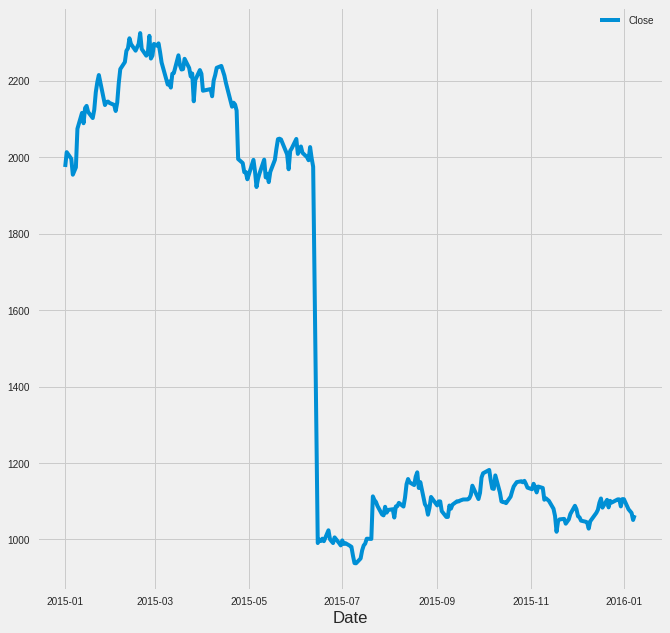

In [3]:

data = get_history(symbol="INFY", start=date(2015,1,1), end=date(2016,1,10))

data[['Close']].plot()
data["Date"]=pd.to_datetime(data.index)
data.head(5)


In [4]:
df = data[['Date','Close']]
df.head(5)

,Date,Close
Date,,
2015-01-01,2015-01-01,1974.40
2015-01-02,2015-01-02,2013.20
2015-01-05,2015-01-05,1995.90
2015-01-06,2015-01-06,1954.20
2015-01-07,2015-01-07,1963.55


In [5]:
def features_build(df):
    df['Year'] = df['Date'].dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['weekofyear'] = df.Date.dt.weekofyear
    start_y = df['Year'][0]
    df[ df['Year'] == start_y ]['weekofyear'] = df [ df ['Year'] == start_y ].Date.dt.weekofyear
    df[ df['Year'] == start_y +1 ]['weekofyear'] += 53 
    df[ df['Year'] == start_y +2]['weekofyear'] += df [ df ['Year'] == start_y +2]['weekofyear'] + 53*2
features_build(df)
df.tail(20)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,Date,Close,Year,Month,Day,weekofyear
Date,,,,,,
2015-12-11,2015-12-11,1052.80,2015,12,11,50
2015-12-14,2015-12-14,1069.50,2015,12,14,51
2015-12-15,2015-12-15,1077.55,2015,12,15,51
2015-12-16,2015-12-16,1095.85,2015,12,16,51
2015-12-17,2015-12-17,1107.10,2015,12,17,51
2015-12-18,2015-12-18,1083.15,2015,12,18,51
2015-12-21,2015-12-21,1103.45,2015,12,21,52
2015-12-22,2015-12-22,1083.75,2015,12,22,52
2015-12-23,2015-12-23,1100.85,2015,12,23,52


In [0]:
weeks= df['weekofyear'].unique()
N=[4,16,28,40,52]


In [7]:
df1=pd.DataFrame()
df1['week']=weeks
df1['weektotal']=0
df1['bday']=0
df1['moving avg']=np.nan
for i in weeks:
  df1['weektotal'][i-1]=df[df['weekofyear']==i]['Close'].sum()
  df1['bday'][i-1]=len(df[df['weekofyear']==i])
  
df1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,week,weektotal,bday,moving avg
0,1,9323,7,NaN
1,2,9961,5,NaN
2,3,10586,5,NaN
3,4,10808,5,NaN
4,5,8568,4,NaN


In [0]:
def moving_avg_pos(df1,n,week_pos):
  x=df1['weektotal'][week_pos-n:week_pos-1]/df1['bday'][week_pos-n:week_pos-1]
  y=x.sum()/n
  return y

In [9]:
dummy = pd.DataFrame()
# First Resampling into Weeks format to calculate for weeks
dummy['Close'] = df1['weektotal']/df1['bday']


for n in N:  
  for week in weeks:
    if week>=n :
      df1['moving avg'][week-1]=moving_avg_pos(df1,n,week)
  dummy[" Moving AVG " + str(n)+ " Weeks"] = df1['moving avg']
  df1['moving avg']=np.nan
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


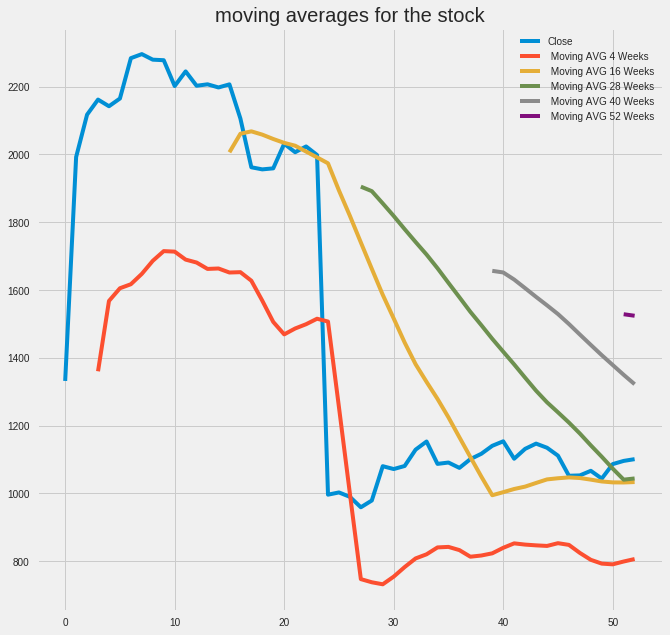

In [10]:
dummy.plot(title='moving averages for the stock')



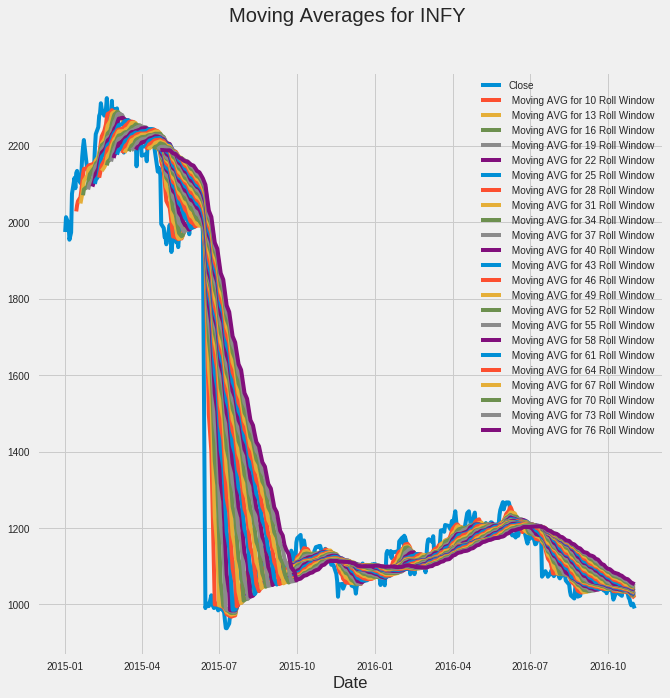

In [11]:
df = get_history(symbol="INFY", start=date(2015,1,1), end=date(2016,11,1))

dummy = pd.DataFrame()
dummy['Close'] = df['Close']

for i in range(10,78,3):
  moving_average = dummy['Close'].rolling(i).mean() # Moving Average using predefined function
  dummy[" Moving AVG for " + str(i)+ " Roll Window"] = moving_average
dummy.plot(title="Moving Averages for {} \n\n" .format("INFY"))


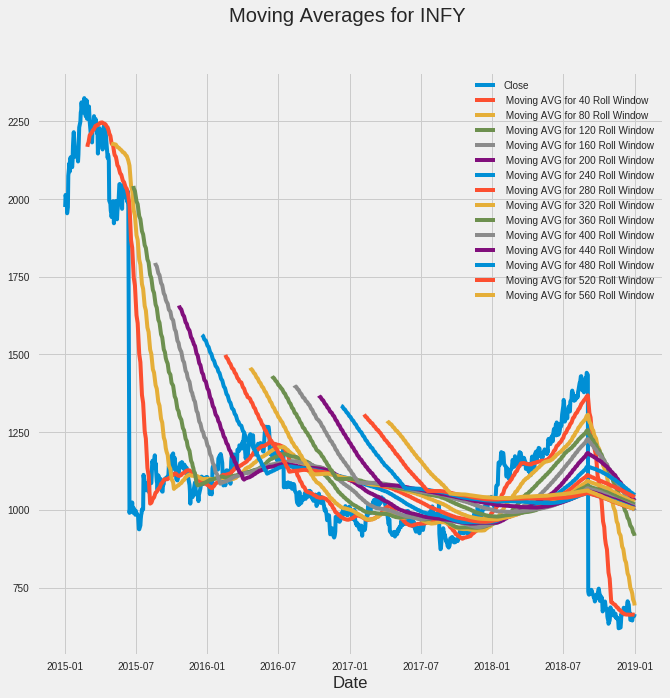

In [32]:
df = get_history(symbol="INFY", start=date(2015,1,1), end=date(2019,1,1))

dummy = pd.DataFrame()
dummy['Close'] = df['Close']

for i in range(40,600,40):
  moving_average = dummy['Close'].rolling(i).mean() # Moving Average using predefined function
  dummy[" Moving AVG for " + str(i)+ " Roll Window"] = moving_average
dummy.plot(title="Moving Averages for {} \n\n" .format("INFY"))


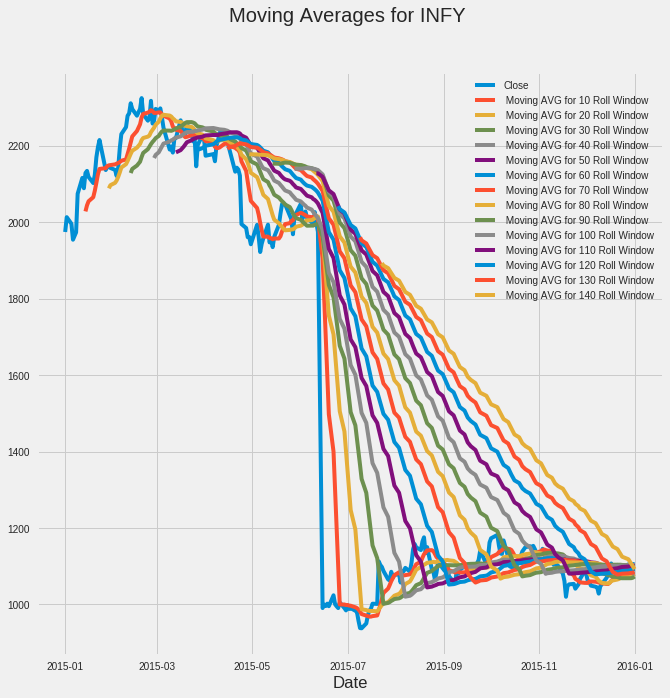

In [13]:
df = get_history(symbol="INFY", start=date(2015,1,1), end=date(2016,1,1))

dummy = pd.DataFrame()
dummy['Close'] = df['Close']

for i in range(10,150,10):
  moving_average = dummy['Close'].rolling(i).mean() # Moving Average using predefined function
  dummy[" Moving AVG for " + str(i)+ " Roll Window"] = moving_average
dummy.plot(title="Moving Averages for {} \n\n" .format("INFY"))


In [0]:
def volume_shock(data):
    
    data["volume t+1"] = data.Volume.shift(1)  #next rows value
      
    data["volume shock"] = ((abs(data["volume t+1"] - data["Volume"])/data["Volume"]*100)  > 10).astype(int)
    
    
    return data

In [15]:
volume_shock(data).head(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Date,volume t+1,volume shock
Date,,,,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154,2015-01-01,NaN,0
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,2015-01-02,500691.0,1
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370,2015-01-05,1694580.0,1
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332,2015-01-06,2484256.0,0
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270,2015-01-07,2416829.0,1


In [0]:
def volume_direction_bool(data):
    
    # 0 - negative and 1- positive
    if data["volume shock"] == 0:
        pass
    else:
        if (data["volume t+1"] - data["Volume"]) > 0:
            return 1
        else:
            return 0

In [0]:
def vol_shock_direction(data):
    data['VOL_SHOCK_DIR'] = 'Nan'
    data['VOL_SHOCK_DIR'] = data.apply(volume_direction_bool, axis=1)
    return data

In [18]:
vol_shock_direction(data).head(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Date,volume t+1,volume shock,VOL_SHOCK_DIR
Date,,,,,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154,2015-01-01,NaN,0,NaN
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,2015-01-02,500691.0,1,0.0
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370,2015-01-05,1694580.0,1,0.0
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332,2015-01-06,2484256.0,0,NaN
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270,2015-01-07,2416829.0,1,1.0


In [0]:
def price_shock(data):
    
    data["price t+1"] = data.Close.shift(1)  #next rows value
    
    data["price shock"] = (abs((data["price t+1"] - data["Close"])/data["Close"]*100)  > 2).astype(int)
    
    data["price black swan"] = data['price shock'] # Since both had same data anad info/
    
    return data

In [20]:
price_shock(data).head(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Trades,Deliverable Volume,%Deliverble,Date,volume t+1,volume shock,VOL_SHOCK_DIR,price t+1,price shock,price black swan
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,...,14908,258080,0.5154,2015-01-01,NaN,0,NaN,NaN,0,0
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,...,54166,1249104,0.7371,2015-01-02,500691.0,1,0.0,1974.4,0,0
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,...,82694,1830962,0.7370,2015-01-05,1694580.0,1,0.0,2013.2,0,0
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,...,108209,1772070,0.7332,2015-01-06,2484256.0,0,NaN,1995.9,1,1
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,...,62463,1317720,0.7270,2015-01-07,2416829.0,1,1.0,1954.2,0,0


In [0]:
def direction_price_bool(data):
    
    # 0 - negative and 1- positive
    if data["price shock"] == 0:
        pass
    else:
        if (data["price t+1"] - data["Close"]) > 0:
            return 1
        else:
            return 0

In [0]:
def price_shock_direction(data):
    data['PRICE_SHOCK_DIR'] = 'Nan'
    data['PRICE_SHOCK_DIR'] = data.apply(direction_price_bool, axis=1)
    return data

In [23]:
price_shock_direction(data).head(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Deliverable Volume,%Deliverble,Date,volume t+1,volume shock,VOL_SHOCK_DIR,price t+1,price shock,price black swan,PRICE_SHOCK_DIR
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,...,258080,0.5154,2015-01-01,NaN,0,NaN,NaN,0,0,NaN
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,...,1249104,0.7371,2015-01-02,500691.0,1,0.0,1974.4,0,0,NaN
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,...,1830962,0.7370,2015-01-05,1694580.0,1,0.0,2013.2,0,0,NaN
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,...,1772070,0.7332,2015-01-06,2484256.0,0,NaN,1995.9,1,1,1.0
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,...,1317720,0.7270,2015-01-07,2416829.0,1,1.0,1954.2,0,0,NaN


In [0]:
def price_shock_wo_vol_shock(data):
    
    data["not_vol_shock"]  = (~(data["volume shock"].astype(bool))).astype(int)
    data["price_shock_w/0_vol_shock"] = data["not_vol_shock"] & data["price shock"]
    
    return data

In [25]:
price_shock_wo_vol_shock(data).head(8)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Date,volume t+1,volume shock,VOL_SHOCK_DIR,price t+1,price shock,price black swan,PRICE_SHOCK_DIR,not_vol_shock,price_shock_w/0_vol_shock
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.90,1971.00,1974.40,1971.34,500691,...,2015-01-01,NaN,0,NaN,NaN,0,0,NaN,1,0
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.00,2017.95,2013.20,2003.25,1694580,...,2015-01-02,500691.0,1,0.0,1974.40,0,0,NaN,0,0
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.50,1996.00,1995.90,2004.59,2484256,...,2015-01-05,1694580.0,1,0.0,2013.20,0,0,NaN,0,0
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.10,1965.10,1954.20,1954.82,2416829,...,2015-01-06,2484256.0,0,NaN,1995.90,1,1,1.0,1,1
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.00,1966.05,1963.55,1962.59,1812479,...,2015-01-07,2416829.0,1,1.0,1954.20,0,0,NaN,0,0
2015-01-08,INFY,EQ,1963.55,1985.60,1997.00,1950.00,1979.25,1973.45,1972.78,3391230,...,2015-01-08,1812479.0,1,0.0,1963.55,0,0,NaN,0,0
2015-01-09,INFY,EQ,1973.45,1980.10,2109.00,1913.05,2075.30,2074.45,2037.69,11215832,...,2015-01-09,3391230.0,1,0.0,1973.45,1,1,0.0,0,0
2015-01-12,INFY,EQ,2074.45,2092.00,2119.20,2075.00,2112.95,2115.95,2099.40,3189722,...,2015-01-12,11215832.0,1,1.0,2074.45,0,0,NaN,0,0


In [35]:
!pip install bokeh

In [0]:
import bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.io import show, output_notebook
from bokeh.palettes import Blues9
from bokeh.palettes import RdBu3
from bokeh.models import ColumnDataSource, CategoricalColorMapper, ContinuousColorMapper
from bokeh.palettes import Spectral11

In [38]:
output_notebook()

Loading BokehJS ...

In [0]:
def bokeh_plot(stock):
    data = dict(stock=stock['Close'], Date=stock.index)
    
    p = figure(plot_width=800, plot_height=250,  title = 'time series for INFY', x_axis_type="datetime")
    p.line(stock.index, stock['Close'], color='blue', alpha=0.5)
    
    #show price shock w/o vol shock
    
    p.circle(stock.index, stock.Close*stock["price_shock_w/0_vol_shock"], size=4, legend='price shock without vol shock')
    show(p)

In [40]:
#output_file("timeseries.html")

bokeh_plot(data)

In [0]:

from statsmodels.tsa.stattools import acf, pacf

def draw_pacf(stock):
    
    lags = 50

    x = list(range(lags))

    p = figure(plot_height=500, title="Partial Autocorrelation PLot " )

    partial_autocorr = pacf(stock["Close"], nlags=lags)
    p.vbar(x=x, top=partial_autocorr, width=0.9)
    show(p)

In [43]:

output_file("PACF.html")

draw_pacf(data)